# House price prediction regression project

## Project goal

## load modules 

In [170]:
"""pip install numpy
pip install pandas
pip install matplotlib
pip install seaborn
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler




## load dataset

In [16]:
train_data_path = r"C:\Users\Prerna\House_Price_Prediction\data\train.csv"
test_data_path = r"C:\Users\Prerna\House_Price_Prediction\data\test.csv"

df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

print("Shape of df_train", df_train.shape)
print("Shape of df_test", df_test.shape)

Shape of df_train (1460, 81)
Shape of df_test (1459, 80)


In [17]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## data integration

In [18]:
df = pd.concat([df_train, df_test])

print("shape of integrated data ", df.shape)

shape of integrated data  (2919, 81)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [20]:
int_features = df.select_dtypes(include = ["int64"]).columns
print("Total number of integer features:", int_features.shape[0])

print("integer feature name:" , int_features)

Total number of integer features: 26
integer feature name: Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [23]:
float_features = df.select_dtypes(include = ["float64"]).columns
print("Total number of integer features:", float_features.shape[0])

print("integer feature name:" , float_features)

Total number of integer features: 12
integer feature name: Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')


In [24]:
cat_features = df.select_dtypes(include = ["object"]).columns
print("Total number of integer features:", cat_features.shape[0])

print("integer feature name:" , cat_features)

Total number of integer features: 43
integer feature name: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


## Get the Statistical features of Numerical features

In [25]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## Handling Missing Values

## Visualise Null/ Missing value

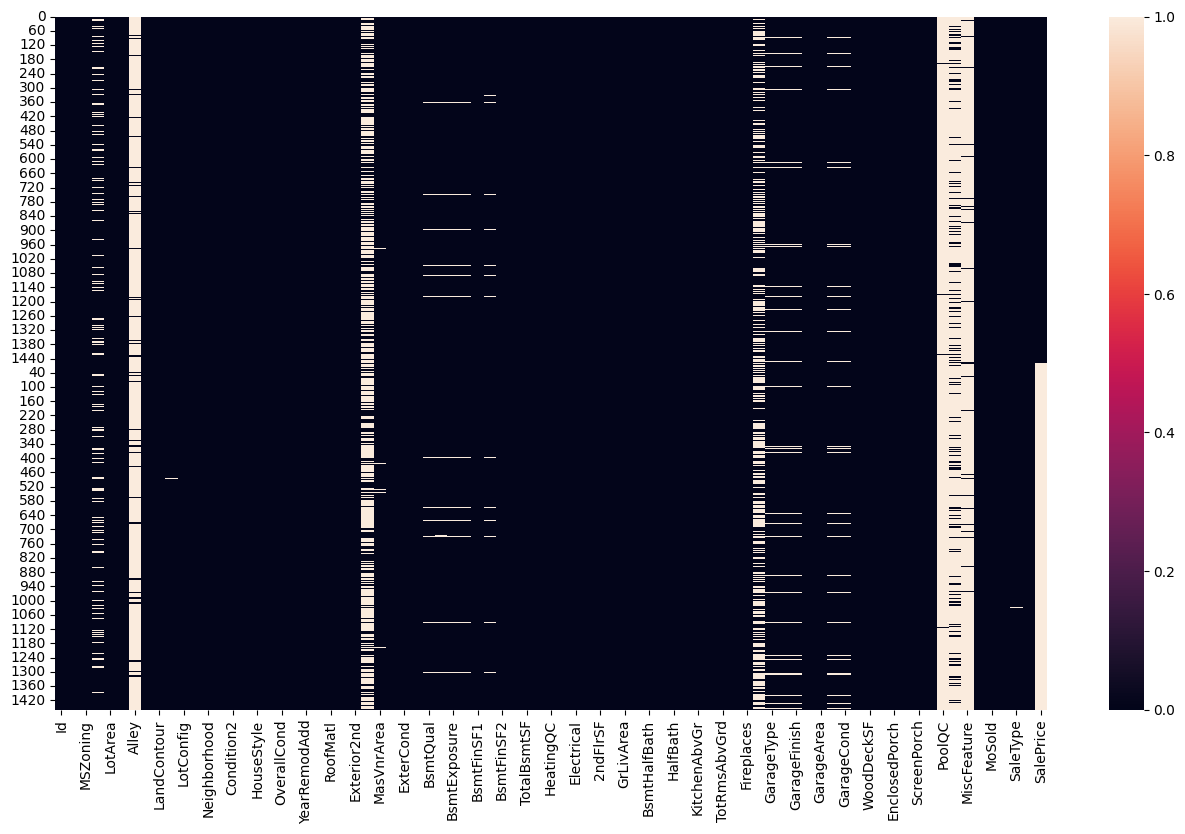

In [26]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("EDA_IMG/heatmap_df_of_null_values.png")

## Get the null value percentage for every feature

In [27]:
#Set indexx as ID column
df = df.set_index("Id")

In [28]:
null_percent = df.isnull().sum()

In [29]:
null_count = df.isnull().sum()
null_count

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

In [30]:
null_percent = df.isnull().sum()/df.shape[0] * 100
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 80, dtype: float64

## Drop Columns/Features

In [31]:
miss_value_50_perc = null_percent[null_percent > 50]
miss_value_50_perc

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

## Missing value Imputation

In [32]:
missing_value_fea = null_percent[null_percent > 0]
print("Total Value feature ", len(missing_value_fea))

Total Value feature  35


In [33]:
cat_na_fea = missing_value_fea[missing_value_fea.keys().isin(cat_features)]
print("total no of categorical missing features", len(cat_na_fea))
cat_na_fea

total no of categorical missing features 23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [34]:
int_na_fea = missing_value_fea[missing_value_fea.keys().isin(int_features)]
print("total no of integer missing features", len(int_na_fea))
int_na_fea

total no of integer missing features 0


Series([], dtype: float64)

In [35]:
float_na_fea = missing_value_fea[missing_value_fea.keys().isin(float_features)]
print("total no of float missing features", len(float_na_fea))
float_na_fea

total no of float missing features 12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

## Handling MSZoning

In [36]:
df["MSZoning"].value_counts()


MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [37]:
## backup of original data
df_mvi = df.copy()
df_mvi.shape

(2919, 80)

In [38]:
mszoning_mode = df["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan, mszoning_mode, inplace=True)
df_mvi["MSZoning"].isnull().sum()

0

In [81]:
sns.countplot(df_mvi["MSZoning"])
plt.show()

KeyError: 0

In [50]:
print(df_mvi.columns)


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [40]:
print(df_mvi["MSZoning"].isnull().sum())


0


In [41]:
print(df_mvi.shape)


(2919, 80)


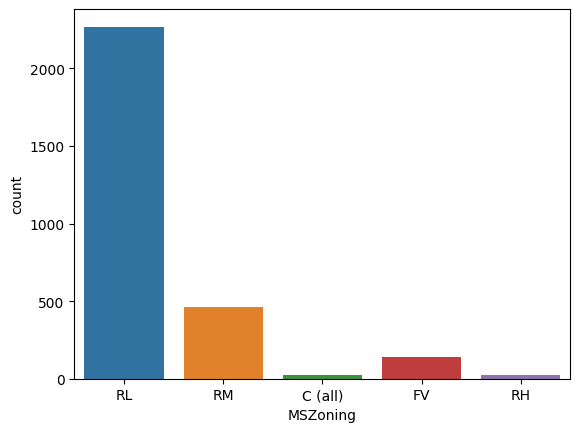

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "MSZoning" is a valid column in your DataFrame df_mvi
sns.countplot(x="MSZoning", data=df_mvi)
plt.show()


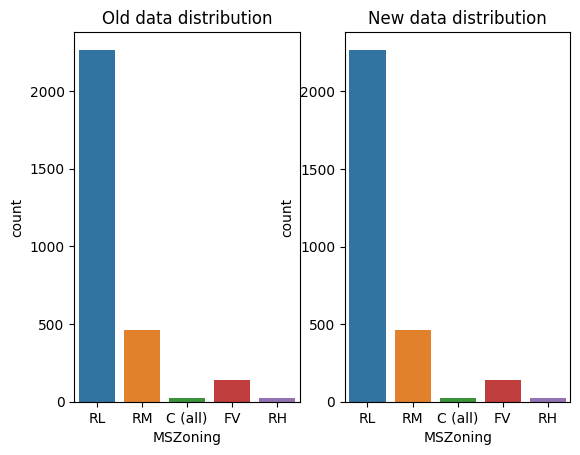

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

def oldNewCountPlot(df, df_new, feature):
    plt.subplot(121)
    sns.countplot(x=feature, data=df)
    plt.title("Old data distribution")
    
    plt.subplot(122)
    sns.countplot(x=feature, data=df_new)
    plt.title("New data distribution")

    plt.show()

# Example usage
oldNewCountPlot(df, df_mvi, "MSZoning")


## Handling Alley

In [44]:
df_mvi["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [45]:
alley_cont = "NA"
df_mvi["Alley"].replace(np.nan, alley_cont, inplace=True)
df_mvi["Alley"].isnull().sum()


0

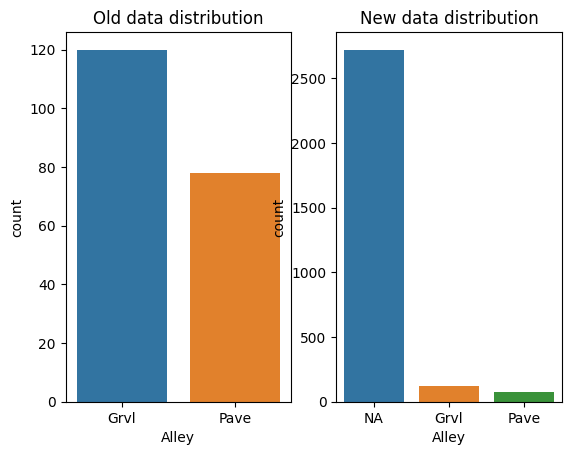

In [46]:
oldNewCountPlot(df, df_mvi, "Alley")

## Handling LotFrontage

C:\Users\Prerna\AppData\Local\Temp\ipykernel_2088\2449983406.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


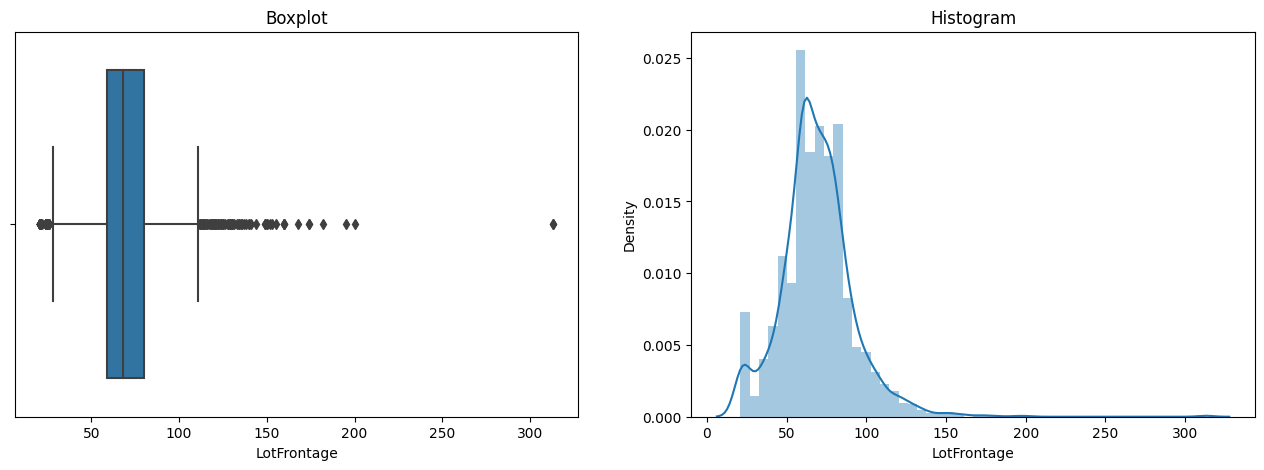

In [49]:
# Assuming you have a DataFrame named df
import seaborn as sns
import matplotlib.pyplot as plt

def boxHistPlot(df, figsize=(16, 5)):
    plt.figure(figsize=figsize)
    
    # Boxplot
    plt.subplot(121)
    sns.boxplot(x=df)
    plt.title("Boxplot")

    # Histogram
    plt.subplot(122)
    sns.distplot(df)
    plt.title("Histogram")

    plt.show()

# Example usage
boxHistPlot(df["LotFrontage"])


In [52]:
lotfrontage_mean = df["LotFrontage"].mean()
df_mvi["LotFrontage"].replace(np.nan, lotfrontage_mean, inplace = True)
df_mvi["LotFrontage"].isnull().sum()

0

In [55]:
def oldNewBoxPlot(df, df_new, feature):
    plt.subplot(221)
    sns.boxplot(df[feature])
    plt.title("Old Data Distribution")
    plt.subplot(222)
    sns.distplot(df[feature])
    plt.title("Old data distribution")
    
    plt.subplot(223)
    sns.boxplot(df_new[feature])
    plt.title("New Data Distribution")
    plt.subplot(224)
    sns.distplot(df_new[feature])
    plt.title("New data distribution")

C:\Users\Prerna\AppData\Local\Temp\ipykernel_2088\134716207.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])  # Reset the index
C:\Users\Prerna\AppData\Local\Temp\ipykernel_2088\134716207.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[feature])  # Reset the index


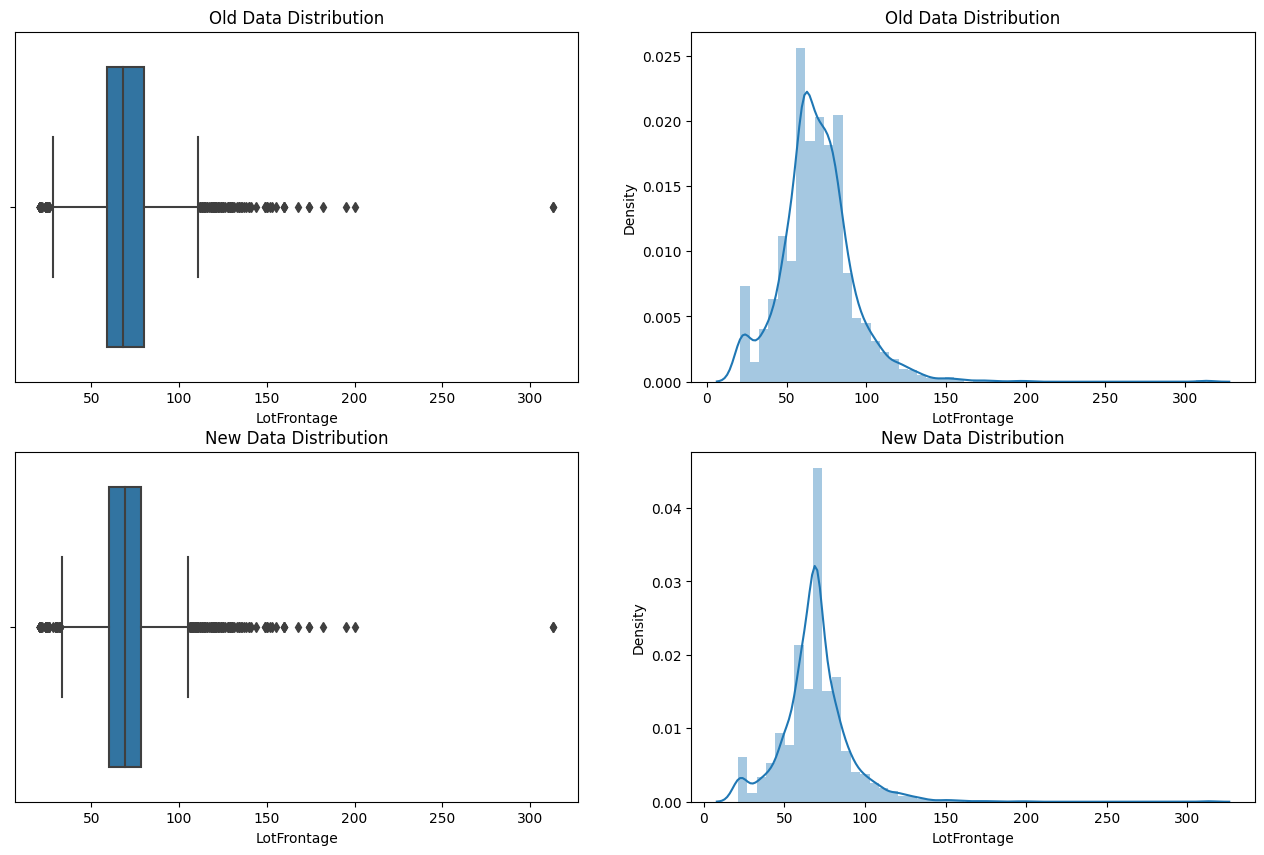

In [79]:
def oldNewBoxPlot(df, df_new, feature, figsize=(16,10)):
    plt.figure(figsize=figsize)
    plt.subplot(221)
    sns.boxplot(x=feature, data=df.reset_index(drop=True))  # Reset the index
    plt.title("Old Data Distribution")
    plt.subplot(222)
    sns.distplot(df[feature])  # Reset the index
    plt.title("Old Data Distribution")
    
    plt.subplot(223)
    sns.boxplot(x=feature, data=df_new.reset_index(drop=True))  # Reset the index
    plt.title("New Data Distribution")
    plt.subplot(224)
    sns.distplot(df_new[feature])  # Reset the index
    plt.title("New Data Distribution")
    

    plt.show()

# Example usage
oldNewBoxPlot(df, df_mvi, "LotFrontage")


## Handling Utilities

In [65]:
df["Utilities"].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [68]:
utilities_mode = df["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan, utilities_mode, inplace = True)
df_mvi["Utilities"].isnull().sum()

0

## Handling Exteriior 1st and Exxterior 2nd

In [71]:
df["Exterior1st"].value_counts()


Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [72]:
df["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [73]:
exterior1st_mode = df["Exterior1st"].mode()[0]
exterior2nd_mode = df["Exterior2nd"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan, utilities_mode, inplace = True)
df_mvi["Exterior2nd"].replace(np.nan, utilities_mode, inplace = True)
df_mvi["Exterior1st"].isnull().sum()
df_mvi["Exterior2nd"].isnull().sum()

0

## HAndling MasVnrType & MasVnrArea

<Axes: ylabel='Id'>

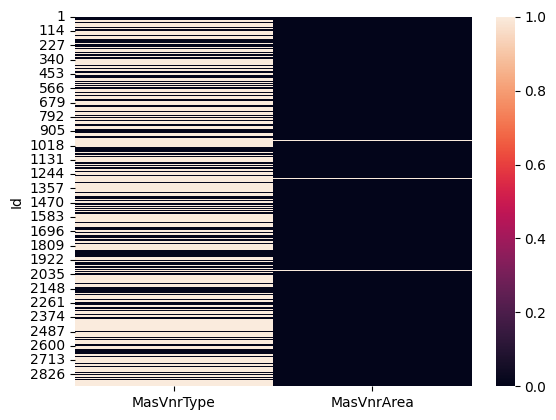

In [74]:
sns.heatmap(df[["MasVnrType","MasVnrArea"]].isnull())

In [75]:
masvnrtype_mode = df["MasVnrType"].mode()[0]
df_mvi["MasVnrType"].replace(np.nan, masvnrtype_mode, inplace= True)
df_mvi["MasVnrType"].isnull().sum()

0

C:\Users\Prerna\AppData\Local\Temp\ipykernel_2088\2449983406.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


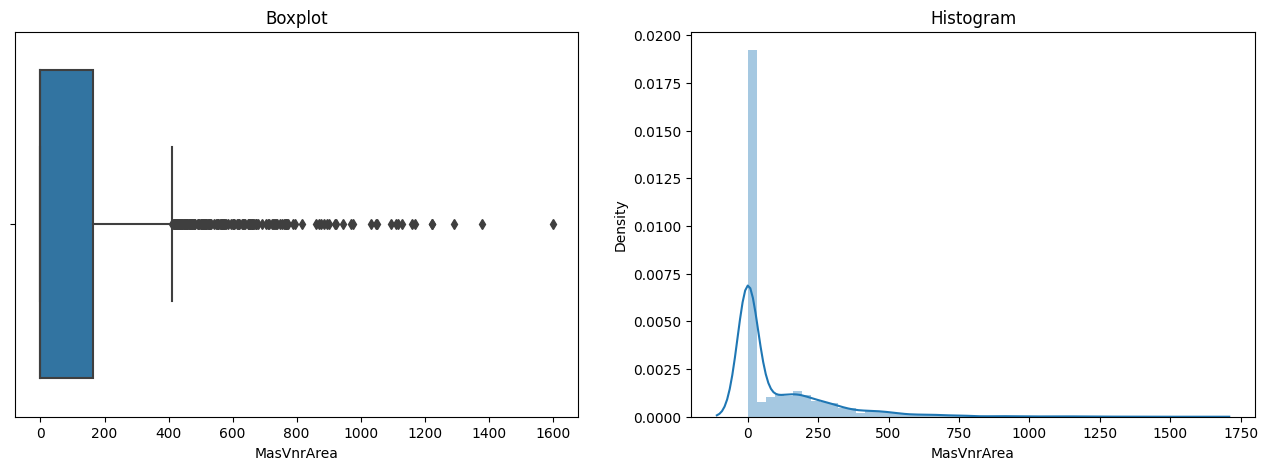

In [76]:
boxHistPlot(df["MasVnrArea"])

In [77]:
masvnrarea_cont = 0
df_mvi["MasVnrArea"].replace(np.nan, masvnrarea_cont, inplace=True)
df_mvi["MasVnrArea"].isnull().sum()

0

## Handling all bsmt features (int + categorical)

In [82]:
cat_bsmt_feat = ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]
num_bsmt_feat =["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath"]


<Axes: ylabel='Id'>

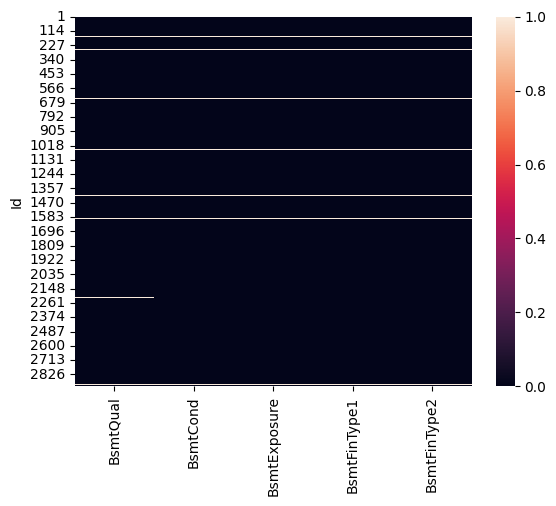

In [83]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [84]:
for feat in cat_bsmt_feat:
    print (f"value count of {feat} : {df[feat].value_counts()}")

value count of BsmtQual : BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
value count of BsmtCond : BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
value count of BsmtExposure : BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
value count of BsmtFinType1 : BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
value count of BsmtFinType2 : BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [85]:
bsmt_cont = "NA"
for feat in cat_bsmt_feat:
    df_mvi[feat].replace(np.nan,bsmt_cont, inplace = True)

In [86]:
df_mvi[cat_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

<Axes: ylabel='Id'>

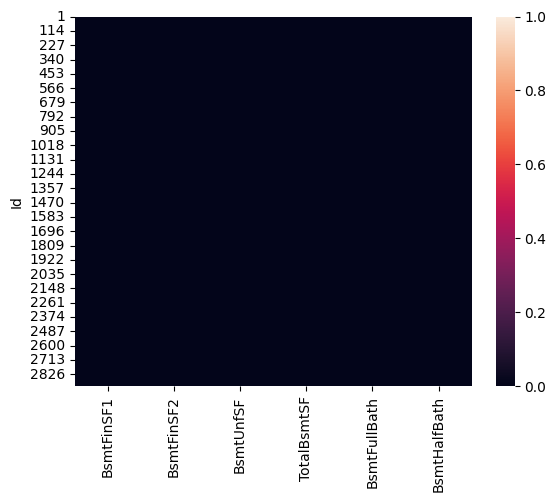

In [87]:
sns.heatmap(df[num_bsmt_feat].isnull())

In [91]:
df_bsmt = df[cat_bsmt_feat + num_bsmt_feat]
df_bsmt[df_bsmt.isnull().any(axis = 1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2804,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2805,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2825,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
bsmt_num = 0
for feat in num_bsmt_feat:
    df_mvi[feat].replace(np.nan, bsmt_num, inplace=True)

In [93]:
df_mvi[num_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

## Handling KitchenQual & Electrical

In [95]:
df["Electrical"].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [96]:
df["KitchenQual"].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [98]:
df[["Electrical", "KitchenQual", "KitchenAbvGr"]].isnull().any(axis = 1)

Id
1       False
2       False
3       False
4       False
5       False
        ...  
2915    False
2916    False
2917    False
2918    False
2919    False
Length: 2919, dtype: bool

In [99]:
df_ekk = df[["Electrical", "KitchenQual", "KitchenAbvGr"]]
df_ekk[df_ekk.isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
Id,,,
1380,NaN,Gd,1
1556,SBrkr,NaN,1


In [100]:
Electrical_mode = df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan,Electrical_mode, inplace = True)
df_mvi["Electrical"].isnull().sum()

0

In [101]:
KitchenQual_mode = df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan,Electrical_mode, inplace = True)
df_mvi["KitchenQual"].isnull().sum()

0

## Handling remaining cat features

In [102]:
df["Functional"].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [103]:
df["SaleType"].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [106]:
SaleType_mode = df["SaleType"].mode()[0]
df_mvi["SaleType"].replace(np.nan,SaleType_mode, inplace = True)
df_mvi["SaleType"].isnull().sum()

0

In [107]:
Functional_mode = df["Functional"].mode()[0]
df_mvi["Functional"].replace(np.nan,Functional_mode, inplace = True)
df_mvi["Functional"].isnull().sum()

0

In [108]:
other_cat_feat =["FireplaceQu" ,
"PoolQC" ,
"Fence",
"MiscFeature"
]

for feat in other_cat_feat:
    print(f"Value count of {feat}: {df[feat].value_counts()}")

Value count of FireplaceQu: FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64
Value count of PoolQC: PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
Value count of Fence: Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
Value count of MiscFeature: MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64


In [109]:
fireplacequ_cont = "NA"
df_mvi["FireplaceQu"].replace(np.nan, fireplacequ_cont, inplace = True)
df_mvi["FireplaceQu"].isnull().sum()

0

In [110]:
poolqc_cont = "NA"
df_mvi["PoolQC"].replace(np.nan, poolqc_cont, inplace = True)
df_mvi["PoolQC"].isnull().sum()

0

In [112]:
fence_cont = "NA"
df_mvi["Fence"].replace(np.nan, fence_cont, inplace = True)
df_mvi["Fence"].isnull().sum()

0

In [113]:
miscfeature_cont = "NA"
df_mvi["MiscFeature"].replace(np.nan, miscfeature_cont, inplace = True)
df_mvi["MiscFeature"].isnull().sum()

0

## Handling Garage Feature

In [ ]:
GarageType       5.378554 NA
GarageFinish     5.447071 NA
GarageQual       5.447071 NA
GarageCond       5.447071 NA

GarageYrBlt      5.447071 0
GarageCars       0.034258 0
GarageArea       0.034258 0


In [115]:
cat_garage_feat = ["GarageType","GarageFinish","GarageQual","GarageCond"]
num_garage_feat = ["GarageYrBlt","GarageCars","GarageArea"]

df_garage = df[num_garage_feat+cat_garage_feat]
df_garage[df_garage.isnull().any(axis=1)]

,GarageYrBlt,GarageCars,GarageArea,GarageType,GarageFinish,GarageQual,GarageCond
Id,,,,,,,
40,NaN,0.0,0.0,NaN,NaN,NaN,NaN
49,NaN,0.0,0.0,NaN,NaN,NaN,NaN
79,NaN,0.0,0.0,NaN,NaN,NaN,NaN
89,NaN,0.0,0.0,NaN,NaN,NaN,NaN
90,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2894,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2910,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2914,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [116]:
garage_cont = "NA"
for feat in cat_garage_feat:
    df_mvi[feat].replace(np.nan, garage_cont, inplace= True)
    
df_mvi[cat_garage_feat].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [118]:
garage_num = 0
for feat in num_garage_feat:
    df_mvi[feat].replace(np.nan, garage_num, inplace= True)
    
df_mvi[num_garage_feat].isnull().sum()

GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [119]:
df_mvi.isnull().any(axis=1).sum()

1459

## Feature Transformation convert numerical to categorical

In [122]:
for_num_conv = ["MSSubClass","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold", "YrSold"]
for feat in for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = int64
YearBuilt: data type = int64
YearRemodAdd: data type = int64
GarageYrBlt: data type = float64
MoSold: data type = int64
YrSold: data type = int64


In [123]:
df_mvi[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,2,2008
2,20,1976,1976,1976.0,5,2007
3,60,2001,2002,2001.0,9,2008
4,70,1915,1970,1998.0,2,2006
5,60,2000,2000,2000.0,12,2008


In [124]:
df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [127]:
calendar.month_abbr[4]

'Apr'

In [129]:
df_mvi["MoSold"] = df_mvi["MoSold"].apply(lambda x : calendar.month_abbr[x])
df_mvi["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [130]:
for feat in for_num_conv:
    df_mvi[feat] = df_mvi[feat].astype(str)

In [131]:
for feat in for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = object
YearBuilt: data type = object
YearRemodAdd: data type = object
GarageYrBlt: data type = object
MoSold: data type = object
YrSold: data type = object


## Convert categorical features into Numerical feature

## Ordinal Encoding

In [134]:
ordinal_end_var = [
"ExterQual",
"ExterCond",
"BsmtQual",  
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinSF1",
"BsmtFinType2",
"HeatingQC",
"KitchenQual",
"FireplaceQu",     
"GarageQual", 
"GarageCond" ,
"PoolQC"  ,
"Functional",
"GarageFinish",
"PavedDrive",
"Utilities"
]

print("Total number of features to convert ordinal numeriacal format", len(ordinal_end_var))

Total number of features to convert ordinal numeriacal format 18


In [141]:
CategoricalDtype

df_mvi["ExterQual"].astype(CategoricalDtype(categories = ["Po","Fa","TA","Gd", "Ex"],ordered = True)).cat.codes

Id
1       3
2       2
3       3
4       2
5       3
       ..
2915    2
2916    2
2917    2
2918    2
2919    2
Length: 2919, dtype: int8

In [139]:
df_mvi["ExterQual"].unique()


array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [145]:
df_mvi["BsmtExposure"] = df_mvi["BsmtExposure"].astype(CategoricalDtype(categories = ["NA","No","Mn","Av", "Gd"],ordered = True)).cat.codes

In [146]:
df_mvi["BsmtExposure"].value_counts()

BsmtExposure
1    1904
3     418
4     276
2     239
0      82
Name: count, dtype: int64

In [152]:
df_mvi['BsmtFinType1'] = df_mvi['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_mvi['BsmtFinType2'] = df_mvi['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_mvi['BsmtQual'] = df_mvi['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['ExterQual'] = df_mvi['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['ExterCond'] = df_mvi['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['Functional'] = df_mvi['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'], ordered = True)).cat.codes
df_mvi['GarageCond'] = df_mvi['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['GarageQual'] = df_mvi['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['GarageFinish'] = df_mvi['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes
df_mvi['HeatingQC'] = df_mvi['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['KitchenQual'] = df_mvi['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['PavedDrive'] = df_mvi['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered = True)).cat.codes
df_mvi['Utilities'] = df_mvi['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered = True)).cat.codes
df_mvi['BsmtCond'] = df_mvi['BsmtCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['FireplaceQu'] = df_mvi['FireplaceQu'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['PoolQC'] = df_mvi['PoolQC'].astype(CategoricalDtype(categories=['NA','Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes

In [153]:
df_mvi.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

## One Hot Encoding for Nominal categorical Data

In [155]:
df_encod = df_mvi.copy()
object_features = df_encod.select_dtypes(include = "object").columns.tolist()
print("total object data type features:", len(object_features))
print("features: \n", object_features)

total object data type features: 32
features: 
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [162]:
print("shape before encoding:" , df_encod.shape)
df_encod = pd.get_dummies(df_encod,
                          columns=object_features, 
                          prefix=object_features, 
                          drop_first = True)
print("shape After encoding:" , df_encod.shape)

shape before encoding: (2919, 80)
shape After encoding: (2919, 515)


In [163]:
df_encod.head(2)


,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_SBrkr,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,3,7,5,196.0,3,2,4,3,...,False,False,False,False,True,False,False,False,True,False
2,80.0,9600,3,6,8,0.0,2,2,4,3,...,False,False,False,False,True,False,False,False,True,False


## Split Data for TRaining & Testing

In [164]:
df_encod.shape

(2919, 515)

In [167]:
len_train = df_train.shape[0]
len_train


1460

In [168]:
X_train = df_encod[:len_train].drop("SalePrice", axis = 1)
y_train = df_encod["SalePrice"][:len_train]

X_test = df_encod[len_train:].drop("SalePrice", axis = 1)
print("shape of X_train", X_train.shape)
print("shape of y_train", y_train.shape)
print("shape of  X_test", X_test.shape)


shape of X_train (1460, 514)
shape of y_train (1460,)
shape of  X_test (1459, 514)


## Feature SZcaling

In [171]:
sc = StandardScaler()
sc.fit(X_train)

#formula z = (x-u)/s
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [172]:
X_train[:3,:]

array([[-0.22335706, -0.20714171,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.45789401, -0.09188637,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08710685,  0.07347998,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

## Train ML MOdel

In [174]:
!pip install xgboost

                                              0.0/99.8 MB ? eta -:--:--
                                              0.2/99.8 MB 5.8 MB/s eta 0:00:18
                                              0.4/99.8 MB 5.1 MB/s eta 0:00:20
                                              0.6/99.8 MB 4.9 MB/s eta 0:00:21
                                              0.9/99.8 MB 5.2 MB/s eta 0:00:19
                                              1.1/99.8 MB 5.1 MB/s eta 0:00:20
                                              1.4/99.8 MB 5.1 MB/s eta 0:00:20
                                              1.6/99.8 MB 5.0 MB/s eta 0:00:20
                                              1.8/99.8 MB 4.9 MB/s eta 0:00:20
                                              2.1/99.8 MB 5.0 MB/s eta 0:00:20
                                              2.3/99.8 MB 5.1 MB/s eta 0:00:20
                                              2.5/99.8 MB 4.9 MB/s eta 0:00:20
     -                                        2.7/99.8 MB 5


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [176]:
import xgboost as xgb

# Create XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Train the model
xg_reg.fit(X_train, y_train)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

In [183]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Create XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=10)

# Cross-validate the model
cv_scores = cross_val_score(xg_reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Convert the scores to positive values
rmse_scores = np.sqrt(-cv_scores)

# Print the RMSE scores
print("XGBoost Cross-Validation RMSE Scores:")
print(rmse_scores)

# Print the mean RMSE
print(f"\nMean RMSE: {rmse_scores.mean()}")



XGBoost Cross-Validation RMSE Scores:
[34385.39861283 43256.14363219 40328.81718808 47647.15525905
 57991.66201315 44426.23131401 38808.85899527 39320.1933273
 55524.56894033 38827.82159063]

Mean RMSE: 44051.68508728295


XGBoost Cross-Validated RMSE: 44642.60298959729
XGBoost Cross-Validated R^2: 0.6839973348216457


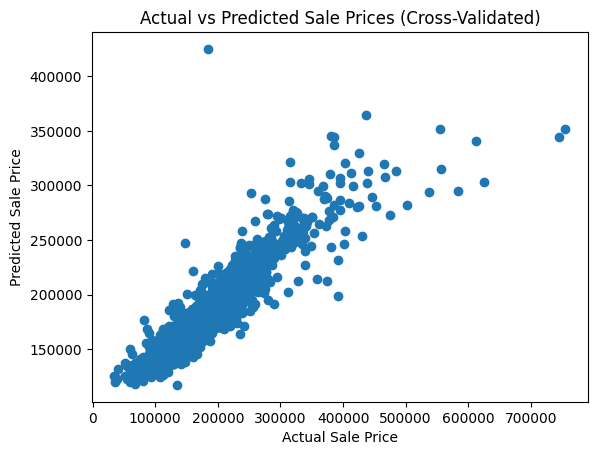

In [186]:
import xgboost as xgb
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=10)

# Perform cross-validated predictions
y_pred_cv = cross_val_predict(xg_reg, X_train, y_train, cv=10)

# Evaluate performance
rmse_cv = np.sqrt(mean_squared_error(y_train, y_pred_cv))
r2_cv = r2_score(y_train, y_pred_cv)

print(f"XGBoost Cross-Validated RMSE: {rmse_cv}")
print(f"XGBoost Cross-Validated R^2: {r2_cv}")

# Plot actual vs predicted values
plt.scatter(y_train, y_pred_cv)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Prices (Cross-Validated)")
plt.show()
